In [1]:
import pandas as pd
import seaborn as sns

from skimpy import skim
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from dataframe import DF

filterwarnings('ignore')

In [2]:
# using dataset from https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

data_path = "../data/Housing.csv"
df = DF(data_path)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 545    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price        │   0 │     0 │ 4800000 │ 1900000 │ 1800000 │ 3400000 │ 4300000 │ 5700000 │ 13000000 │  ▆▇▃▁  │  │
│ │ area         │   0 │     0 │    5200 │    2200 │    1600 │    3600 │    4600 │    6400 │    16000 │  ▇▇▃▁  │  │
│ │ bedrooms     │   0 │     0 │       3 │    0.74 │       1 │       2 │       3 │       3 │        6 │   ▃▇▃  │  │
│ │ bathrooms    │   0 │     0 │     1.3 │     0.5 │       1 │       1 │       1 │       2 │        4 │  ▇ ▃   │  │
│ │ stories      │   0 │     0 │     1.8 │    0.87 │       1 │       1 │       2 │       2 │        4 │ ▇ ▇ ▁▁ │  │
│ │ parking      │   0 │     0 │    0.69 │    0.86 │       0 │       0 │       0 │       1 │        3 │ ▇ ▃ ▃  │  │
│ └──────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mainroad                         │      0 │         0 │                          1 │                   545 │  │
│ │ guestroom                        │      0 │         0 │                          1 │                   545 │  │
│ │ basement                         │      0 │         0 │                          1 │                   545 │  │
│ │ hotwaterheating                  │      0 │         0 │                          1 │                   545 │  │
│ │ airconditioning                  │      0 │         0 │                          1 │                   545 │  │
│ │ prefarea                         │      0 │         0 │                          1 │                   545 │  │
│ │ furnishingstatus                 │      0 │         0 │                          1 │                   545 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
df = df.feature_engineering()
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 545    │ │ bool        │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price        │   0 │     0 │ 4800000 │ 1900000 │ 1800000 │ 3400000 │ 4300000 │ 5700000 │ 13000000 │  ▆▇▃▁  │  │
│ │ area         │   0 │     0 │    5200 │    2200 │    1600 │    3600 │    4600 │    6400 │    16000 │  ▇▇▃▁  │  │
│ │ bedrooms     │   0 │     0 │       3 │    0.74 │       1 │       2 │       3 │       3 │        6 │   ▃▇▃  │  │
│ │ bathrooms    │   0 │     0 │     1.3 │     0.5 │       1 │       1 │       1 │       2 │        4 │  ▇ ▃   │  │
│ │ stories      │   0 │     0 │     1.8 │    0.87 │       1 │       1 │       2 │       2 │        4 │ ▇ ▇ ▁▁ │  │
│ │ parking      │   0 │     0 │    0.69 │    0.86 │       0 │       0 │       0 │       1 │        3 │ ▇ ▃ ▃  │  │
│ └──────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                      ┃ true         ┃ true rate              ┃ hist            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ mainroad_no                                      │           77 │                   0.14 │     ▇    ▁      │  │
│ │ mainroad_yes                                     │          468 │                   0.86 │     ▁    ▇      │  │
│ │ guestroom_no                                     │          448 │                   0.82 │     ▂    ▇      │  │
│ │ guestroom_yes                                    │           97 │                   0.18 │     ▇    ▂      │  │
│ │ basement_no                                      │          354 │                   0.65 │     ▅    ▇      │  │
│ │ basement_yes                                     │          191 │                   0.35 │     ▇    ▅      │  │
│ │ hotwaterheating_no                               │          520 │                   0.95 │          ▇      │  │
│ │ hotwaterheating_yes                              │           25 │                  0.046 │        ▇        │  │
│ │ airconditioning_no                               │          373 │                   0.68 │     ▃    ▇      │  │
│ │ airconditioning_yes                              │          172 │                   0.32 │     ▇    ▃      │  │
│ │ prefarea_no                                      │          417 │                   0.77 │     ▂    ▇      │  │
│ │ prefarea_yes                                     │  

<Axes: >

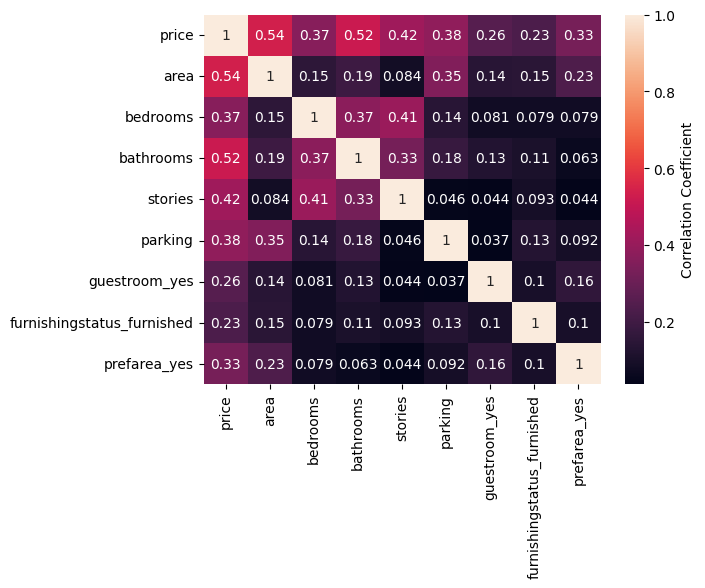

In [4]:
features = ["price", "area", "bedrooms", "bathrooms", "stories", "parking", "guestroom_yes", "furnishingstatus_furnished", "prefarea_yes"]
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cbar_kws={'label': 'Correlation Coefficient'})

In [18]:
using_feafures = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
samples = df.sample(frac=1.0, replace=True).loc[:, using_feafures].reset_index(drop=True)
samples

price  area  bedrooms  bathrooms  stories  parking
0    3850000  7152         3          1        2        0
1    6300000  9000         3          1        1        1
2    4340000  4075         3          1        1        2
3    2450000  4840         2          1        2        0
4    6440000  8580         5          3        2        2
..       ...   ...       ...        ...      ...      ...
540  2660000  2800         3          1        1        0
541  2870000  5400         4          1        2        0
542  5740000  5800         3          2        4        0
543  3836000  3350         3          1        2        0
544  1820000  3000         2          1        1        2

[545 rows x 6 columns]

In [19]:
y = samples["price"]
x_train, x_test, y_train, y_test = train_test_split(samples, y, test_size=0.2, random_state=0)
print(f"x train: {x_train.shape[0]} samples\nx test: {x_test.shape[0]} samples")

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
scaler = StandardScaler()
x_train[features] = scaler.fit_transform(x_train[features])
x_test[features] = scaler.transform(x_test[features])
x_train

x train: 436 samples
x test: 109 samples


price      area  bedrooms  bathrooms   stories   parking
542  5740000  0.281877 -0.054602   1.307448  2.346249 -0.864382
496  6083000  2.057989 -0.054602  -0.599065 -0.960748  1.352504
484  3815000 -0.950242 -1.377175   1.307448 -0.960748 -0.864382
507  4690000 -0.727066 -0.054602  -0.599065  0.141584  1.352504
252  3990000 -0.508539  1.267971  -0.599065 -0.960748 -0.864382
..       ...       ...       ...        ...       ...       ...
70   5460000 -0.950242 -0.054602   1.307448 -0.960748 -0.864382
277  5803000  0.839818 -0.054602  -0.599065 -0.960748  1.352504
9    4585000 -0.629426 -0.054602  -0.599065  0.141584  0.244061
359  3710000 -0.741014 -0.054602  -0.599065 -0.960748  0.244061
192  4200000 -1.333826 -0.054602  -0.599065  0.141584 -0.864382

[436 rows x 6 columns]

### Train the model

In [20]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [23]:
train_pred = regr.predict(x_train)
test_pred = regr.predict(x_test)

train_mse = mean_squared_error(y_train, train_pred, squared=True)
test_mse = mean_squared_error(y_test, test_pred, squared=True)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"MSE (Train, Test): {train_mse}, {test_mse}")
print(f"R2 (Train, Test): {train_r2}, {test_r2}")

MSE (Train, Test): 9.959242433037719e-20, 9.49920252040052e-20
R2 (Train, Test): 1.0, 1.0
